**1.7 Learning Rate Scheduling: Melhorando a Convergência**

O que são Schedulers e Por que Usar?
Os schedulers de taxa de aprendizado são técnicas utilizadas para ajustar a taxa de aprendizado durante o treinamento de modelos de aprendizado de máquina. A taxa de aprendizado (learning rate) é um hiperparâmetro crucial que determina o quão grande será o passo de atualização dos pesos do modelo em cada iteração. Se a taxa de aprendizado for muito alta, o modelo pode pular o mínimo global, resultando em uma má convergência. Por outro lado, se for muito baixa, o treinamento pode ser extremamente lento.Benefícios dos Schedulers:
Aceleração da Convergência: Ajustar a taxa de aprendizado ao longo do treinamento pode ajudar o modelo a convergir mais rapidamente.

Evitar Mínimos Locais: Uma taxa de aprendizado adaptativa pode ajudar o modelo a sair de mínimos locais e encontrar uma solução melhor.

Estabilidade do Treinamento: Reduzir a taxa de aprendizado de forma adequada pode estabilizar o processo de treinamento e melhorar a performance geral.

Principais Tipos de Agendadores de Taxa de Aprendizado
StepLR (Redução por Steps Fixos)
O StepLR reduz a taxa de aprendizado em intervalos regulares (steps). Isso pode ser útil em situações onde o treinamento inicial rápido é desejado, mas uma taxa de aprendizado menor é necessária para ajuste fino nos estágios posteriores.

In [2]:
import torch
import torch.optim as optim
import torch.nn as nn

# Define a simple linear model
model = nn.Linear(10, 2) # Input size 10, output size 2

optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

for epoch in range(100):
    # treinamento
    # Sample input (replace with your actual training data)
    inputs = torch.randn(1, 10)
    optimizer.zero_grad()  # Clear previous gradients
    outputs = model(inputs) # perform a forward pass
    loss = outputs.sum()  # Sample loss (replace with your actual loss)
    loss.backward() #calculate the gradients
    optimizer.step() # update the weights

    scheduler.step()

    print(f"Epoch {epoch}, LR: {scheduler.get_last_lr()[0]}")

Epoch 0, LR: 0.1
Epoch 1, LR: 0.1
Epoch 2, LR: 0.1
Epoch 3, LR: 0.1
Epoch 4, LR: 0.1
Epoch 5, LR: 0.1
Epoch 6, LR: 0.1
Epoch 7, LR: 0.1
Epoch 8, LR: 0.1
Epoch 9, LR: 0.1
Epoch 10, LR: 0.1
Epoch 11, LR: 0.1
Epoch 12, LR: 0.1
Epoch 13, LR: 0.1
Epoch 14, LR: 0.1
Epoch 15, LR: 0.1
Epoch 16, LR: 0.1
Epoch 17, LR: 0.1
Epoch 18, LR: 0.1
Epoch 19, LR: 0.1
Epoch 20, LR: 0.1
Epoch 21, LR: 0.1
Epoch 22, LR: 0.1
Epoch 23, LR: 0.1
Epoch 24, LR: 0.1
Epoch 25, LR: 0.1
Epoch 26, LR: 0.1
Epoch 27, LR: 0.1
Epoch 28, LR: 0.1
Epoch 29, LR: 0.010000000000000002
Epoch 30, LR: 0.010000000000000002
Epoch 31, LR: 0.010000000000000002
Epoch 32, LR: 0.010000000000000002
Epoch 33, LR: 0.010000000000000002
Epoch 34, LR: 0.010000000000000002
Epoch 35, LR: 0.010000000000000002
Epoch 36, LR: 0.010000000000000002
Epoch 37, LR: 0.010000000000000002
Epoch 38, LR: 0.010000000000000002
Epoch 39, LR: 0.010000000000000002
Epoch 40, LR: 0.010000000000000002
Epoch 41, LR: 0.010000000000000002
Epoch 42, LR: 0.01000000000000000

ExponentialLR (Decaimento Exponencial)
O ExponentialLR aplica um decaimento exponencial à taxa de aprendizado, o que pode ser vantajoso em cenários onde um decaimento gradual é preferível.


In [3]:
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

for epoch in range(100):
    # treinamento do modelo
    optimizer.step()
    scheduler.step()

    print(f"Epoch {epoch}, LR: {scheduler.get_last_lr()[0]}")


Epoch 0, LR: 9.000000000000003e-05
Epoch 1, LR: 8.100000000000003e-05
Epoch 2, LR: 7.290000000000002e-05
Epoch 3, LR: 6.561000000000002e-05
Epoch 4, LR: 5.904900000000002e-05
Epoch 5, LR: 5.314410000000002e-05
Epoch 6, LR: 4.782969000000002e-05
Epoch 7, LR: 4.304672100000002e-05
Epoch 8, LR: 3.874204890000002e-05
Epoch 9, LR: 3.4867844010000016e-05
Epoch 10, LR: 3.138105960900002e-05
Epoch 11, LR: 2.8242953648100018e-05
Epoch 12, LR: 2.5418658283290016e-05
Epoch 13, LR: 2.2876792454961016e-05
Epoch 14, LR: 2.0589113209464913e-05
Epoch 15, LR: 1.8530201888518422e-05
Epoch 16, LR: 1.667718169966658e-05
Epoch 17, LR: 1.5009463529699922e-05
Epoch 18, LR: 1.350851717672993e-05
Epoch 19, LR: 1.2157665459056937e-05
Epoch 20, LR: 1.0941898913151244e-05
Epoch 21, LR: 9.84770902183612e-06
Epoch 22, LR: 8.862938119652508e-06
Epoch 23, LR: 7.976644307687257e-06
Epoch 24, LR: 7.1789798769185315e-06
Epoch 25, LR: 6.461081889226678e-06
Epoch 26, LR: 5.81497370030401e-06
Epoch 27, LR: 5.23347633027361

**Cosine Annealing (Ajuste Suave da Taxa de Aprendizado) **negrito**

O CosineAnnealingLR ajusta a taxa de aprendizado de forma suave usando a função cosseno, o que pode ser benéfico para evitar grandes oscilações na taxa de aprendizado e proporcionar uma convergência mais suave.

In [4]:
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

for epoch in range(100):
    # treinamento do modelo
    optimizer.step()
    scheduler.step()

    print(f"Epoch {epoch}, LR: {scheduler.get_last_lr()[0]}")


Epoch 0, LR: 2.653519246092244e-09
Epoch 1, LR: 2.6456676605720586e-09
Epoch 2, LR: 2.6326161188191985e-09
Epoch 3, LR: 2.6144161293062797e-09
Epoch 4, LR: 2.5911395190771263e-09
Epoch 5, LR: 2.5628781502782404e-09
Epoch 6, LR: 2.5297435576208802e-09
Epoch 7, LR: 2.491866508204508e-09
Epoch 8, LR: 2.449396485438794e-09
Epoch 9, LR: 2.402501099100885e-09
Epoch 10, LR: 2.3513654238561938e-09
Epoch 11, LR: 2.2961912688532425e-09
Epoch 12, LR: 2.237196381275155e-09
Epoch 13, LR: 2.1746135869910005e-09
Epoch 14, LR: 2.108689871698461e-09
Epoch 15, LR: 2.0396854061841133e-09
Epoch 16, LR: 1.967872519548203e-09
Epoch 17, LR: 1.893534624446094e-09
Epoch 18, LR: 1.8169650985880007e-09
Epoch 19, LR: 1.738466126911196e-09
Epoch 20, LR: 1.6583475089941193e-09
Epoch 21, LR: 1.5769254364189753e-09
Epoch 22, LR: 1.4945212449080105e-09
Epoch 23, LR: 1.4114601461582246e-09
Epoch 24, LR: 1.3280699443793771e-09
Epoch 25, LR: 1.2446797426005297e-09
Epoch 26, LR: 1.161618643850744e-09
Epoch 27, LR: 1.07921

**Interação entre Schedulers e Inicialização de Pesos**


A inicialização dos pesos do modelo pode ter um impacto significativo na eficácia dos schedulers. Inicializações inadequadas podem resultar em um desempenho ruim, mesmo com a otimização da taxa de aprendizado. Por exemplo, se os pesos forem inicializados com valores muito grandes ou muito pequenos, o treinamento pode se tornar instável ou extremamente lento. Um bom ponto de partida é usar métodos de inicialização como Xavier ou He, dependendo da ativação usada no modelo.

**Testes Práticos Comparando Diferentes Schedulers**

Vamos comparar os diferentes schedulers com um exemplo prático utilizando um conjunto de dados simples.

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


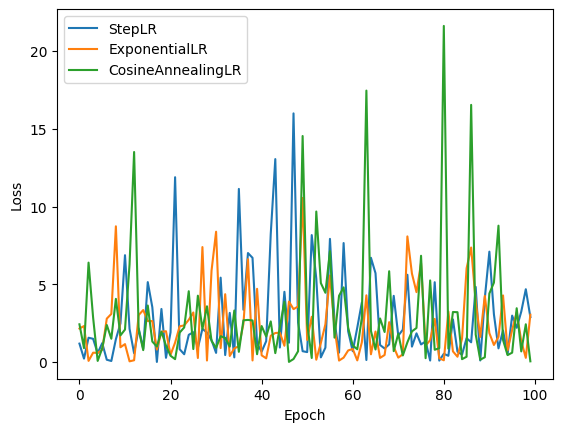

In [7]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a simple linear model
model = nn.Linear(10, 2) # Input size 10, output size 2
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

def train(model, optimizer, scheduler, epochs=100):
    losses = []
    for epoch in range(epochs):
        # Treinamento do modelo
        inputs = torch.randn(1, 10) # dummy input
        target = torch.randn(1, 2) # dummy target
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target) #calculate loss
        losses.append(loss.item()) # append the numerical value of the loss, not the tensor
        loss.backward()
        optimizer.step()
        scheduler.step()

    return losses

# Schedulers
schedulers = {
    'StepLR': optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1),
    'ExponentialLR': optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9),
    'CosineAnnealingLR': optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)
}

# Treinando e plotando resultados
for name, scheduler in schedulers.items():
    # reinitialize the model and optimizer for each scheduler to be compared
    model = nn.Linear(10, 2)
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    losses = train(model, optimizer, scheduler)
    plt.plot(losses, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**1.8 Avaliação Final e Conclusões**
Curvas de Aprendizado (Loss x Época) para Cada Experimento
As curvas de aprendizado mostram a evolução da função de perda ao longo das épocas de treinamento. Elas são cruciais para entender o comportamento do modelo e a eficácia dos schedulers.

**Comparação entre os Diferentes Métodos**

Ao comparar os diferentes métodos de agendamento de taxa de aprendizado, podemos observar as variações na convergência e estabilidade do treinamento. Por exemplo, o StepLR pode ser mais eficaz em situações onde ajustes bruscos são aceitáveis, enquanto o Cosine Annealing pode proporcionar uma convergência mais suave.

Impacto Conjunto da Inicialização, Otimizadores, Regularização e Schedulers
A combinação desses fatores desempenha um papel essencial no desempenho final do modelo. Inicializações adequadas de pesos, a escolha correta de otimizadores (como Adam, SGD), técnicas de regularização (como dropout, weight decay) e o uso de schedulers de taxa de aprendizado podem resultar em um modelo mais robusto e eficaz.

Conclusão sobre Melhores Estratégias

A melhor estratégia depende do problema específico. No entanto, uma abordagem equilibrada que combina inicialização de pesos, otimização, regularização e schedulers de taxa de aprendizado geralmente leva a melhores resultados. Experimentar diferentes combinações e analisar as curvas de aprendizado pode fornecer insights valiosos para ajustar a estratégia de treinamento.